# Eastern Europe Dataset Exploration 

In this short exercise, I simply want to explore characteristics of the region of Eastern Europe. I will try to see interesting patterns and what the the story behind the data set is.

In [1]:
#Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib import rc
import geopandas


## Initial Exploration

I start with importing necessary packages seen above. These are important for the codes in this notebook to run. After setting the packages, I open the data set and checks initial content through .head().

In [2]:
#Viewing of dataset
world_df = pd.read_excel('WDIW Dataset.xlsx')
world_df.head()

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.7,97.091973,99.5,68.957,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,100.000000,100.0,19.642,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617,47.965907,28750.0,18.879748,59.383,1.541285
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.0,100.000000,100.0,10.071,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948,45.615016,2381740.0,NaN,72.052,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830,NaN,200.0,NaN,87.170,-0.249256
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.0,100.000000,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850,79.285586,470.0,NaN,88.150,-0.495265


I want to separate the rest of the world from Eastern Europe by filtering the region out. This will be useful for comparison later on during the analysis.

In [3]:
#Selecting the rest of the world but Eastern Europe
world = world_df.loc[world_df['Cool Name'] != 'Skids & Mudflap']
world.head()

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,AFG,Afghanistan,Middle East & Russia,Mirage,97.70000,97.091973,99.500000,68.957,86.000753,4.750925,...,NaN,0.1,29.8,NaN,74.750,52.655431,652860.0,9.250468,25.250,3.463407
2,DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,100.00000,100.000000,100.000000,10.071,55.804001,9.624334,...,NaN,0.1,3.9,NaN,27.948,45.615016,2381740.0,NaN,72.052,2.871374
3,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.830,NaN,200.0,NaN,87.170,-0.249256
5,AGO,Angola,Sub-Saharan Africa,Sideswipe,41.88623,NaN,72.722191,150.526,96.820228,4.407194,...,NaN,2.0,25.0,NaN,35.161,46.762624,1246700.0,9.223777,64.839,4.391957
6,ATG,Antigua & Barbuda,Carribean Islands & Parts of Latin America,Ratchet,100.00000,100.000000,100.000000,42.782,44.523535,12.393227,...,NaN,NaN,NaN,NaN,75.287,68.189701,440.0,NaN,24.713,0.412161


I am only interested to see Eastern Europe data so I filter the data set through the column "Cool Name" and choosing only "Skids & Mudflap". 

In [4]:
#Selecting only Eastern Europe
east_eu = world_df.loc[world_df['Cool Name'] == 'Skids & Mudflap']
east_eu.head()

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
1,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,19.642,45.682097,19.418064,...,NaN,NaN,6.2,NaN,40.617,47.965907,28750.0,18.879748,59.383,1.541285
4,AND,Andorra,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.850,79.285586,470.0,NaN,88.150,-0.495265
24,BIH,Bosnia & Herzegovina,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,9.642,43.979067,22.676345,...,NaN,0.1,2.5,NaN,52.124,55.781042,51210.0,20.259337,47.876,-0.280615
47,HRV,Croatia,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,8.681,52.579572,30.550089,...,19.4,0.1,2.5,NaN,43.333,57.811759,56590.0,21.610752,56.667,-0.733638
51,CZE,Czech Republic,Eastern Europe,Skids & Mudflap,100.0,100.0,100.0,11.972,52.397391,28.950481,...,NaN,0.1,2.5,NaN,26.325,54.460285,78870.0,14.877358,73.675,0.408265


I want to see a brief summary of each column just to see initial picture of the region. 

In [5]:
#Initial exploration 
east_eu.describe().round(1)

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",...,Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
count,22.0,22.0,22.0,19.0,19.0,19.0,19.0,20.0,19.0,20.0,...,3.0,13.0,19.0,0.0,21.0,20.0,22.0,17.0,21.0,21.0
mean,100.0,100.0,100.0,11.8,51.0,27.2,23.8,4.4,1.2,10.5,...,18.8,0.2,3.0,NaN,29.8,59.2,115846.6,20.8,70.2,0.3
std,0.0,0.0,0.0,6.2,5.0,4.6,2.2,4.2,1.0,1.8,...,3.7,0.2,1.1,NaN,14.5,8.3,164632.9,3.8,14.5,0.9
min,100.0,100.0,100.0,3.8,42.7,18.9,21.3,0.5,0.4,8.2,...,14.8,0.1,2.5,NaN,2.9,45.8,60.0,14.9,47.9,-1.2
25%,100.0,100.0,100.0,7.5,47.7,23.8,22.0,2.0,0.7,9.2,...,17.1,0.1,2.5,NaN,18.1,55.1,21933.8,17.7,57.7,-0.3
50%,100.0,100.0,100.0,10.5,51.6,28.8,23.4,3.1,0.9,10.6,...,19.4,0.1,2.5,NaN,31.9,57.6,53900.0,20.9,68.1,0.3
75%,100.0,100.0,100.0,15.2,53.8,30.4,25.6,5.7,1.0,10.8,...,20.8,0.1,2.7,NaN,42.3,61.7,91862.5,23.2,81.9,0.5
max,100.0,100.0,100.0,25.7,60.1,34.1,28.0,19.0,4.6,16.4,...,22.2,0.9,6.2,NaN,52.1,79.3,625217.1,27.9,97.1,2.8


Since it seems to be a big data set, I want to see what the columns are and what the topics are. I use a for loop to list down the column headers. 

In [6]:
for col in east_eu.columns: 
    print(col)

Country Code
Country Name
Hult Region
Cool Name
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Agriculture, forestry, and fishing, value added (% of GDP)
Armed forces personnel (% of total labor force)
Birth rate, crude (per 1,000 people)
Births attended by skilled health staff (% of total)
Death rate, crude (per 1,000 people)
Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)
Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)
Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)
Educational attainment, at least completed lower secondary, popu

## Map Visualization

I want to visualize the map of the world first and use geopandas.

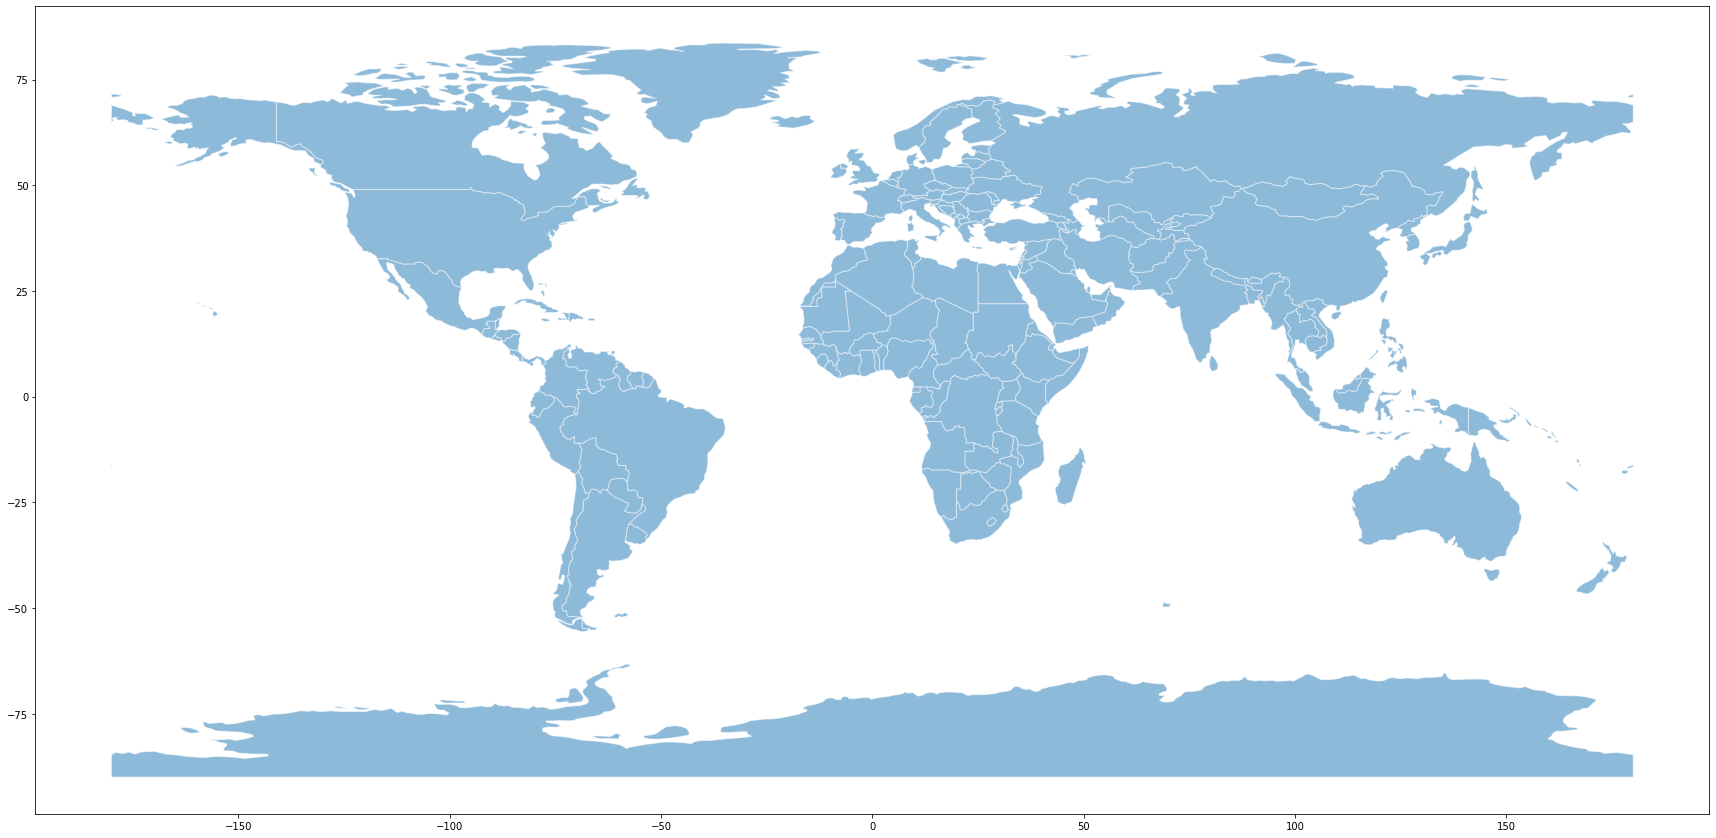

In [7]:
#Map of the world
world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_map.plot(figsize=(30,30), alpha =0.5,edgecolor='w')


Based on the map above, I want to zoom into Europe. The code below shows that I set continent to only Europe.

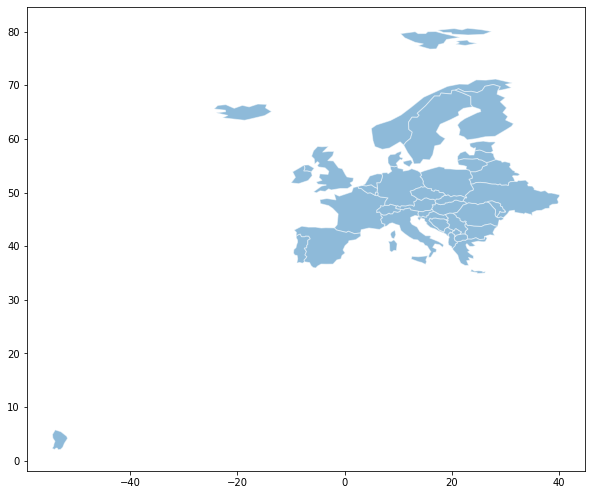

In [8]:
#Map of Europe
europe_map = world_map[(world_map.continent=="Europe")&(world_map.name!="Russia")]
europe_map.plot(figsize=(10,10), alpha=0.5, edgecolor='w')

I create a data frame of the country name with the corresponding country code. I put it as country_df for reference later.

In [9]:
#Country codes
country_df = east_eu.loc[:,['Country Name']]


To further understand Europe and its countries, I check how they are plotted based on the data frame of the map. The code below reveals a data frame that shows all the countries clasified as Europe and identified by the index on the left most column before "pop_est"

In [10]:
#Exploring European Map
europe_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
112,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."
113,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."
116,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821..."
117,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403..."


I want to further narrow down to just Eastern Europe so with the europe_map data frame that I recently explored I join the east_eu data frame that I created on the initial exploration. These two are joined at "iso_a3" column and "Country Code".

In [11]:
#Inner Joining Europe Map with East Europe list to filter out only East Europe Countries
east_eu_map = pd.merge(europe_map,east_eu,how='inner',left_on=['iso_a3'],right_on=['Country Code'])

I am only concerned up until the 6th column, "geometry" of east_eu_map as it is the only ones necessary for plotting. Code below shows slicing of the data.

In [12]:
#Cleaning East Europe Map to only necessary columns for plotting 
east_eu_map = east_eu_map.iloc[:,:6]

I am left with the visuals of only Eastern Europe.

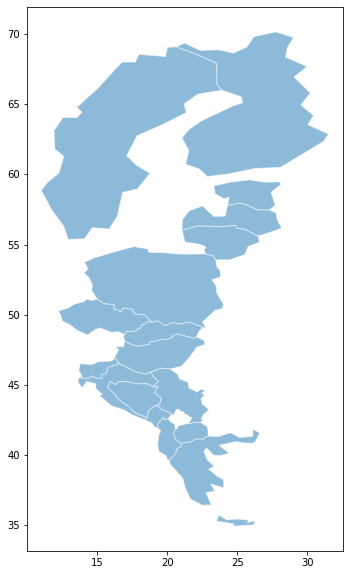

In [13]:
#Plotting only eastern Europe
east_eu_map.plot(figsize=(10,10), alpha=0.5, edgecolor='w')

## GDP of Eastern Europe

I want to check the overall GDP of the region by getting the total from the GDP column.

In [14]:
#Total GDP Eastern Europe
total_GDP = east_eu['GDP (current US$)'].sum().round(0)
f"{total_GDP:,}"

'2,692,425,617,859.0'

As the amount above is aggregated from the entire region, I want to see what is the percentage contribution of each country. On the code below, I divide GDP of a country over the total of the region to see which ones are performing well.

In [15]:
#Percentage GDP per country in the region
GDP_share = 100*east_eu['GDP (current US$)'].round(0)/east_eu['GDP (current US$)'].sum().round()
GDP_share

1       0.483767
4       0.111921
24      0.671518
47      2.050249
51      8.019295
62      0.988389
67      9.371889
76      7.542847
87      5.190901
105     0.268448
109     1.131445
115     1.765860
118     0.418935
124     0.473506
133     0.179934
147    14.837509
156    19.550067
167     0.060646
171     1.638687
176     3.551358
177     1.799712
187    19.893117
Name: GDP (current US$), dtype: float64

I want to see how each country contributes to GDP in the region. By joining my country_df, which has the names of the countries, and GDP_share, which has the corresponding share, I am able to see the contribution. Data is sorted to see which countries are on top.

In [16]:
#Combine country names with GDP share and sort
GDP_share_complete = pd.concat([country_df,GDP_share], axis=1, join='inner')
GDP_share_complete = GDP_share_complete.sort_values(by=['GDP (current US$)'],ascending=False).round(2)

#Renaming of columns 
GDP_share_complete.columns = ['Country', 'GDP Share']
GDP_share_complete

,Country,GDP Share
187,Sweden,19.89
156,Poland,19.55
147,Norway,14.84
67,Finland,9.37
51,Czech Republic,8.02
76,Greece,7.54
87,Hungary,5.19
176,Slovakia,3.55
47,Croatia,2.05
177,Slovenia,1.80


I want to compare side-by-side the GDP Share and annual GDP Growth so I combine "GDP_share_complete" and the "GDP growth (annual %)" column from the east_eu data frame.

In [17]:
#Combinng of GDP Share and annual GDP Growth
GDP_share_growth = pd.concat([GDP_share_complete,east_eu['GDP growth (annual %)']], axis=1, join='inner')
GDP_share_growth.round(2)

,Country,GDP Share,GDP growth (annual %)
187,Sweden,19.89,2.10
156,Poland,19.55,4.81
147,Norway,14.84,1.98
67,Finland,9.37,3.04
51,Czech Republic,8.02,4.35
76,Greece,7.54,1.51
87,Hungary,5.19,4.14
176,Slovakia,3.55,3.19
47,Croatia,2.05,2.92
177,Slovenia,1.80,4.88


## Population of Eastern Europe

I want to further understand the population of Eastern Europe so I sliced east_eu according to necessery columns that I would need.

In [18]:
#Slicing of Eastern Europe data frame for columns only concerned with population
population = east_eu.loc[:,['Country Name','Population, total',
                            'Population ages 0-14 (% of total population)',
                            'Population ages 15-64 (% of total population)',
                            'Population ages 65 and above (% of total population)',
                           'Population growth (annual %)',
                           'Population, female',
                           'Population, male']]
population
                                

,Country Name,"Population, total",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male"
1,Albania,2873457.0,18.028312,68.642614,13.329073,-0.091972,1409327.0,1464130.0
4,Andorra,77001.0,NaN,NaN,NaN,-0.383674,NaN,NaN
24,Bosnia & Herzegovina,3351527.0,14.795712,69.454532,15.749756,-1.031207,1709258.0,1642269.0
47,Croatia,4124531.0,14.438026,65.539582,20.022391,-1.200610,2139934.0,1984597.0
51,Czech Republic,10594438.0,15.385375,65.617918,18.996707,0.265643,5385332.0,5209106.0
62,Estonia,1317384.0,16.221890,64.464942,19.313167,0.121071,698154.0,619230.0
67,Finland,5508214.0,16.251165,62.470082,21.278753,0.234671,2794857.0,2713357.0
76,Greece,10754679.0,14.204807,64.395839,21.399354,-0.197783,5475485.0,5279194.0
87,Hungary,9787966.0,14.372266,67.049873,18.577861,-0.265861,5133501.0,4654465.0
105,Kosovo,1830700.0,NaN,NaN,NaN,0.795200,NaN,NaN


I want to see a quick overview how population is in the region. I want to see the mean, min and max.

In [19]:
#Use of describe() to see quick overview of population of Eastern Europe
east_eu_pop_describe = population.describe().round(2)
east_eu_pop_describe 

,"Population, total",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male"
count,22.00,19.00,19.00,19.00,22.00,19.00,19.00
mean,5728752.59,15.75,66.29,17.96,0.05,3343518.68,3187596.32
std,8001749.45,1.32,2.19,2.53,0.89,4294692.17,4048743.49
min,33671.00,14.20,62.47,13.25,-1.40,233468.00,234531.00
25%,1858587.00,14.76,65.04,16.29,-0.35,1045171.50,1034725.00
50%,3112492.00,15.39,65.97,19.00,0.04,2139934.00,1984597.00
75%,6642697.00,16.46,67.70,19.86,0.26,4302889.00,4047529.50
max,37974826.00,18.25,70.09,21.40,2.74,19565914.00,18408912.00


Here, I compare it to the world's overview.

In [20]:
#Slicing of Eastern Europe data frame for columns only concerned with population
world_population = world.loc[:,['Country Name','Population, total',
                            'Population ages 0-14 (% of total population)',
                            'Population ages 15-64 (% of total population)',
                            'Population ages 65 and above (% of total population)',
                           'Population growth (annual %)',
                           'Population, female',
                           'Population, male']]

#Use of describe() to see quick overview of population of the rest of the world
world_population.describe()

,"Population, total",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male"
count,1.940000e+02,174.000000,174.000000,174.000000,194.000000,1.740000e+02,1.740000e+02
mean,7.664337e+07,28.925096,63.413607,7.661297,1.361425,4.234914e+07,4.308226e+07
std,5.552612e+08,10.236923,6.807138,5.539177,1.144648,2.899739e+08,2.956652e+08
min,1.137000e+04,11.475227,47.316356,1.034678,-2.421393,4.660300e+04,4.598600e+04
25%,7.529812e+05,20.116888,57.734309,3.224866,0.558200,1.074932e+06,1.071394e+06
50%,7.440066e+06,27.929752,64.762915,5.673318,1.298031,4.886036e+06,4.891351e+06
75%,2.778290e+07,38.333905,67.544974,10.359720,2.146415,1.507288e+07,1.539864e+07
max,7.510990e+09,50.092883,85.257134,27.109479,4.677987,3.722940e+09,3.785204e+09


## Age Dependency Population of Eastern Europe

Age dependency might show interesting information to reveal about the region. I want to slice the east_eu data frame based on this topic.

In [21]:
#Slicing of Eastern Europe data frame using appropriate columns
age_dependency = east_eu.loc[:,['Country Name','Population, total',
                                'Age dependency ratio (% of working-age population)',
                                'Age dependency ratio, old (% of working-age population)',
                                'Age dependency ratio, young (% of working-age population)']]
age_dependency

,Country Name,"Population, total",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)"
1,Albania,2873457.0,45.682097,19.418064,26.264034
4,Andorra,77001.0,NaN,NaN,NaN
24,Bosnia & Herzegovina,3351527.0,43.979067,22.676345,21.302722
47,Croatia,4124531.0,52.579572,30.550089,22.029484
51,Czech Republic,10594438.0,52.397391,28.950481,23.446910
62,Estonia,1317384.0,55.123161,29.959223,25.163939
67,Finland,5508214.0,60.076618,34.062301,26.014317
76,Greece,10754679.0,55.289532,33.230959,22.058573
87,Hungary,9787966.0,49.142708,27.707529,21.435179
105,Kosovo,1830700.0,NaN,NaN,NaN


I want to compare data from above with the rest of the world, so I slice the world data frame accordingly.

In [22]:
#Slicing of world data frame using appropriate columns
world_age_dependency = world.loc[:,['Country Name','Population, total','Age dependency ratio (% of working-age population)','Age dependency ratio, old (% of working-age population)','Age dependency ratio, young (% of working-age population)']]
world_age_dependency

,Country Name,"Population, total",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)"
0,Afghanistan,3.629640e+07,86.000753,4.750925,81.249828
2,Algeria,4.138920e+07,55.804001,9.624334,46.179668
3,American Samoa,5.562000e+04,NaN,NaN,NaN
5,Angola,2.981675e+07,96.820228,4.407194,92.413034
6,Antigua & Barbuda,9.542600e+04,44.523535,12.393227,32.130308
...,...,...,...,...,...
212,West Bank,4.454805e+06,73.481011,5.367632,68.113379
213,World,7.510990e+09,54.216831,13.216044,39.644081
214,Yemen,2.783482e+07,74.987414,4.990006,69.997409
215,Zambia,1.685369e+07,90.462311,3.970773,86.491538


I want to see a quick idea how Eastern Europe's Age dependency compared to the rest of the world. Codes below will show the difference in number. 

In [23]:
#Use of describe() to see quick overview of age dependency of Eastern Europe
east_eu_ad_describe = age_dependency.describe().round(2)
east_eu_ad_describe 

,"Population, total",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)"
count,22.00,19.00,19.00,19.00
mean,5728752.59,51.01,27.22,23.79
std,8001749.45,4.99,4.57,2.18
min,33671.00,42.68,18.90,21.30
25%,1858587.00,47.73,23.75,22.04
50%,3112492.00,51.58,28.79,23.45
75%,6642697.00,53.75,30.37,25.59
max,37974826.00,60.08,34.06,27.99


In [24]:
#Use of describe() to see quick overview of age dependency of the rest of the world 
world_ad_describe = world_age_dependency.describe().round(2)
world_ad_describe

,"Population, total",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)"
count,1.940000e+02,174.00,174.00,174.00
mean,7.664337e+07,59.57,11.82,47.74
std,5.552612e+08,17.65,8.30,21.94
min,1.137000e+04,17.29,1.23,15.82
25%,7.529812e+05,48.05,5.68,29.69
50%,7.440066e+06,54.41,8.48,42.47
75%,2.778290e+07,73.21,14.79,66.73
max,7.510990e+09,111.34,45.13,105.87
